In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

Loading our dataset

In [4]:
x , y = load_breast_cancer(return_X_y=True)

Splitting the dataset and initiating our model of DTC

In [5]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=0)
clf = DecisionTreeClassifier(random_state=0)

Fitting DTC with x , y Train dataset

In [6]:
clf.fit(x_train , y_train)

DecisionTreeClassifier(random_state=0)

So we've Created our model and then we're going to predict our model on X_test and will check the Accuracy 

In [7]:
pred = clf.predict(x_test)
accuracy_score(y_test , pred)

0.8811188811188811

So we've 88% accuracy score Normally with our DTC Model \
Let us look at our DT , how does it look like actually :

In [13]:
x_train.shape

(426, 30)

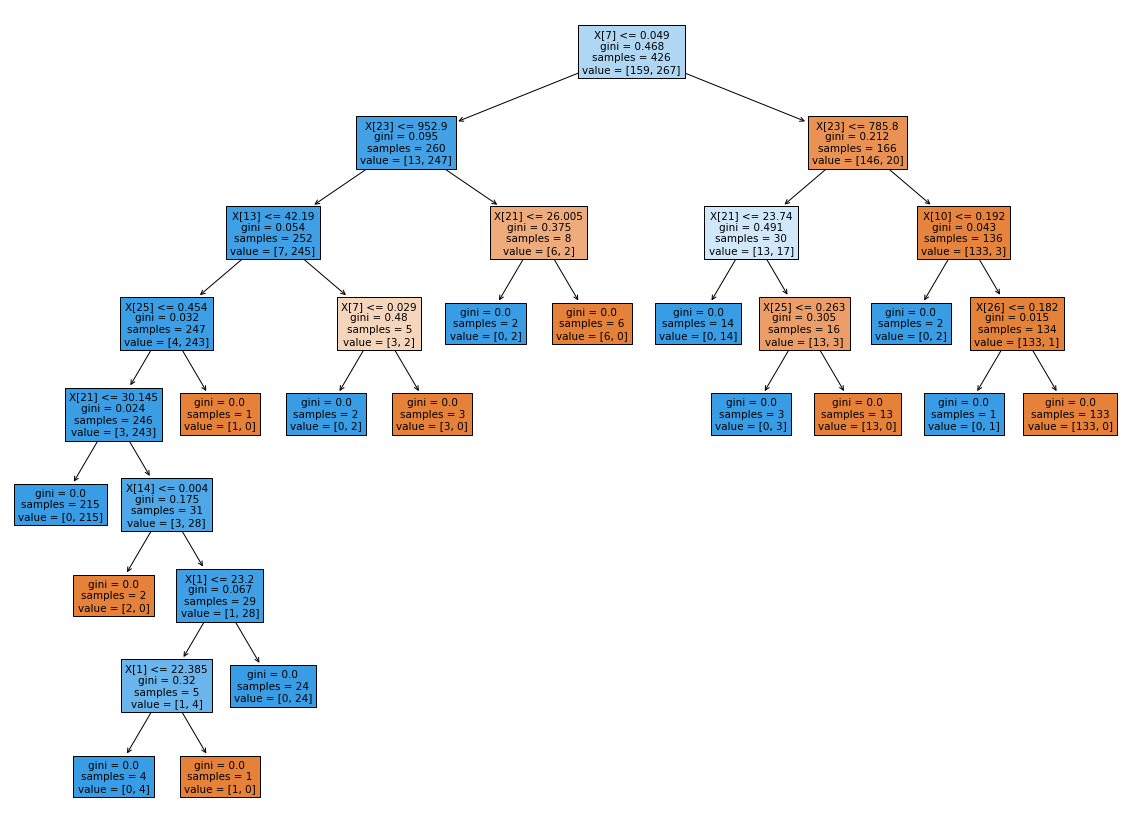

In [12]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(clf,filled=True);

we see that our DT has a lot of tabs and a lot of Nodes , and that's what exactly we were saying earlier , as we've this main sample and max tab prevent it from **Overfitting** but still need **Cost Complexity Purning** , what doest it do ?

it will select the **Appropriate Accurate Parameters** to avoid overfitting and give us **the Best Accuracy** with the best Model that avoid totally Overfitting.

Moving forward we're using Now **CCP** with our x train and y train datasets and we'll take the values of **cpp_alphas**

In [17]:
path = clf.cost_complexity_pruning_path(x_train , y_train)
ccp_alphas , impurities = path.ccp_alphas , path.impurities 

we're actually taking out the values of "Alphas" for our ccp from our dataset and it'll take the Alphas using **the leaf node** in its method

In [19]:
ccp_alphas , impurities

(array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352]))

Now , we can see thaat the **Pick points** of our datasets which give us the Alphas values which we're going to train our classifier .

In a further step , we'll look into taking the classifier 

In [22]:
clfs=[]
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0 , ccp_alpha=ccp_alpha)
  clf.fit(x_train , y_train)
  clfs.append(clf)
  print("the Number of Nodes in the last tree is: {} with ccp_alpha of: {}".format(clfs[-1].tree_.node_count , ccp_alpha))

the Number of Nodes in the last tree is: 31 with ccp_alpha of: 0.0
the Number of Nodes in the last tree is: 27 with ccp_alpha of: 0.0022664723976040134
the Number of Nodes in the last tree is: 21 with ccp_alpha of: 0.004647426339100881
the Number of Nodes in the last tree is: 19 with ccp_alpha of: 0.004659799593581376
the Number of Nodes in the last tree is: 17 with ccp_alpha of: 0.005633802816901408
the Number of Nodes in the last tree is: 15 with ccp_alpha of: 0.007042253521126761
the Number of Nodes in the last tree is: 13 with ccp_alpha of: 0.007841938420144537
the Number of Nodes in the last tree is: 11 with ccp_alpha of: 0.009114019793328328
the Number of Nodes in the last tree is: 9 with ccp_alpha of: 0.011443661971830986
the Number of Nodes in the last tree is: 7 with ccp_alpha of: 0.018988002086593604
the Number of Nodes in the last tree is: 5 with ccp_alpha of: 0.023141627543035996
the Number of Nodes in the last tree is: 3 with ccp_alpha of: 0.03422474765119576
the Number of

it give us the Number of Nodes of each ccp_alpha picked

##**Accuracy vs Alpha for training and Testing sets**



Finally, What we'll do , is to take out thes values of alphas for which we have **the maximum Accuracy** with Respect to training and testing for that we'll use **MATPLOTLIB**

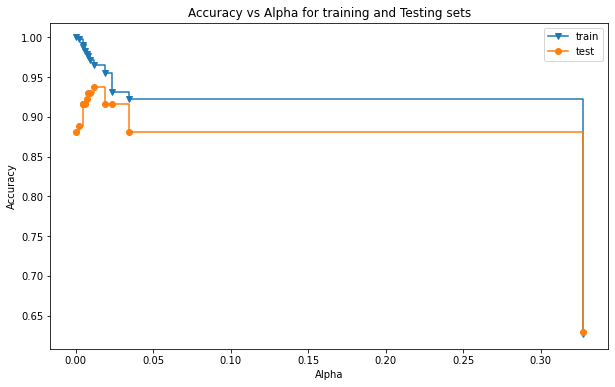

In [24]:
train_scores = [clf.score(x_train,y_train) for clf in clfs]
test_scores = [clf.score(x_test , y_test) for clf in clfs]

fig , ax = plt.subplots()
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6  #To make it large 
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Alpha for training and Testing sets')
ax.plot(ccp_alphas , train_scores , marker='v' , label='train' , drawstyle='steps-post')
ax.plot(ccp_alphas , test_scores , marker ='o' , label='test' , drawstyle='steps-post')
ax.legend()
plt.show()

We can see that for value of alpha=0 the Accuracy was=1(100%) in the train but in the test Accuracy was =0.88 which we saw earlier as well , so it Just shows the case of **Overfitting** , we can see that with increasing the value of alpha initially the training accuracy decreases but our test accuracy increase , it's because **Overfitting is reduced** here and our Model is getting better and better , but finally the increasing of alpha it's not affecting much and then it's totally **ruining** our Accuracy .

Somewhere here which is almost alpha=0.012 in our case as we can see the akoha that we're using earlier (ccp_alphas) which was clearly close enough , is the one which we'll get higher training accuracy **without overfitting** and high rest accuracy . 

###so with this Method we can see that how use ccp_alps deom the method of **ccpp** and Calculating the Models's Accuracy with respect to each alpha , then finding the most optimum alpha \
###Now we can train our final DTC with best alpha =0.012

In [25]:
clf = DecisionTreeClassifier(random_state=0 , ccp_alpha=0.012)
clf.fit(x_train , y_train)
pred = clf.predict(x_test)
accuracy_score(y_test , pred)

0.9370629370629371

###Now Finally , plotting the optimum decision tree for this Model , and it looks like 'perfect' with decreases Nodes comparing to the previous one ✅

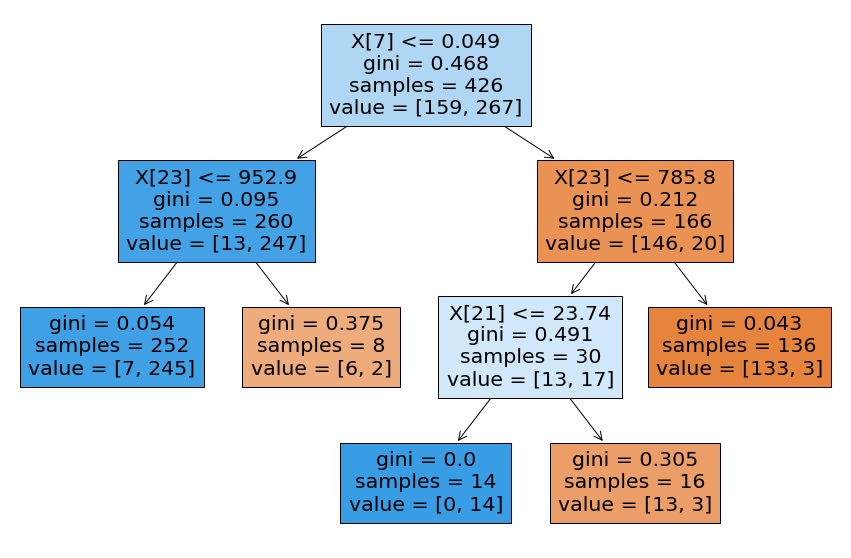

In [27]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True);